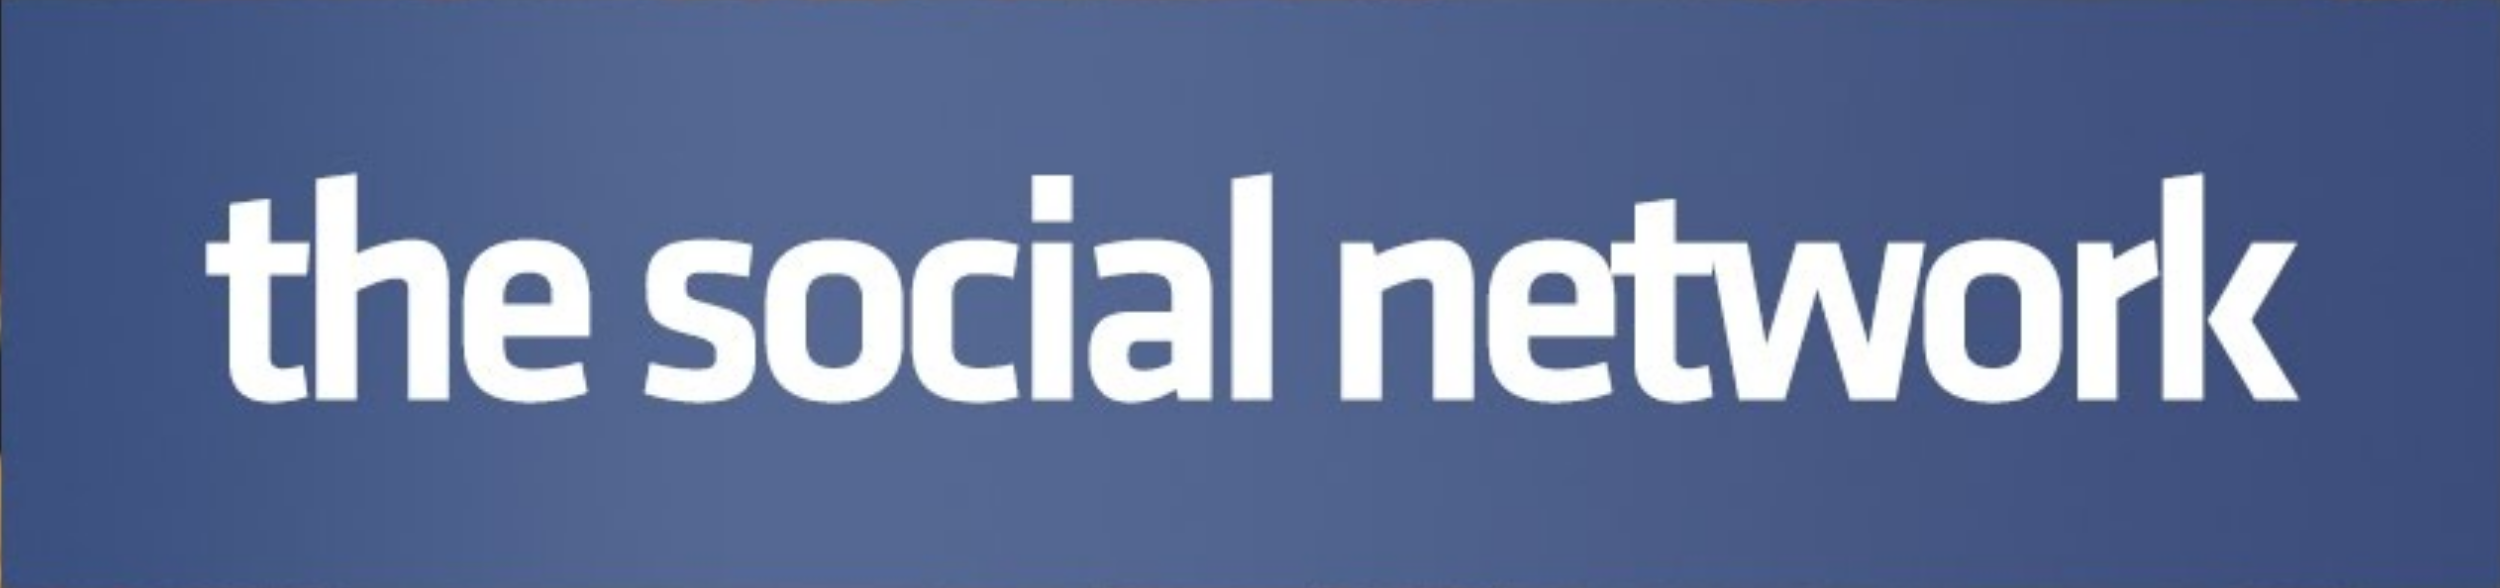

__Bullet Points__
1. Import Data
1. Basic Transformations
1. Exploring actors, genres, and companies
1. Franchise game 
    * Create a network
    * Different colors for movie/character
    * Plot the network
1. Marvel
    * How to separate classes (movies/actors) keeping the network
    * Get the most central group
    * Find the most central node
1. Cluster & Profiling
    * Cluster
    * Profile
1. Bonus: 6 degrees of Kevin Bacon

# Libs

In [1]:
# Regular Libs
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#!pip install networkx

In [2]:
# Network Libs
import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms.community import greedy_modularity_communities

# 1. Import Data

Import the `tmdb_5000_credits.csv` and the `tmdb_5000_movies.csv` datasets.
Slice the following features:
* `tmdb_5000_credits` - ['movie_id', 'title', 'cast']
* `tmdb_5000_movies` - ['id', 'genres', 'production_companies' , 'release_date', 'budget', 'revenue', 'runtime', 'vote_average']

Merge the 2 datasets using the keys `movie_id` and `id` as an inner merge

In [5]:
df_credits = pd.read_csv('tmdb_5000_credits.csv')[['movie_id', 'title', 'cast']]

df_credits.head()

,movie_id,title,cast
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."


In [6]:
df_movies = pd.read_csv('tmdb_5000_movies.csv')[['id', 'genres', 'production_companies' , 'release_date', 'budget', 'revenue', 'runtime', 'vote_average']]

df_movies.head()

,id,genres,production_companies,release_date,budget,revenue,runtime,vote_average
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,237000000,2787965087,162.0,7.2
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,300000000,961000000,169.0,6.9
2,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,245000000,880674609,148.0,6.3
3,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,250000000,1084939099,165.0,7.6
4,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,260000000,284139100,132.0,6.1


In [10]:
df = df_credits.merge(df_movies, left_on = 'movie_id', right_on= 'id', how='inner')

df.head()

,movie_id,title,cast,id,genres,production_companies,release_date,budget,revenue,runtime,vote_average
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,237000000,2787965087,162.0,7.2
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,300000000,961000000,169.0,6.9
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,245000000,880674609,148.0,6.3
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,250000000,1084939099,165.0,7.6
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,260000000,284139100,132.0,6.1


# 2. Some basic transformations

Notice how the features `cast`, `genres`, and `production_companies` are columns of lists of dictionaries. This is really messy because at this moment Python is assuming the content of these columns to be strings.<br>
Let's first use the function `ast.literal_eval` so that the lists are classified as lists and not as strings

In [11]:
#This is the way to transform strings in to dictionaries in Pandas
df['cast'] = df['cast'].apply(ast.literal_eval)
df['genres'] = df['genres'].apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(ast.literal_eval)

In [12]:
df.head(2)

,movie_id,title,cast,id,genres,production_companies,release_date,budget,revenue,runtime,vote_average
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...",19995,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...",2009-12-10,237000000,2787965087,162.0,7.2
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...",285,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",2007-05-19,300000000,961000000,169.0,6.9


Create a new feature called `year` which regards the movie's release date

In [13]:
df['year'] = pd.to_datetime(df['release_date']).dt.year

df.head()

,movie_id,title,cast,id,genres,production_companies,release_date,budget,revenue,runtime,vote_average,year
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...",19995,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...",2009-12-10,237000000,2787965087,162.0,7.2,2009.0
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...",285,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",2007-05-19,300000000,961000000,169.0,6.9,2007.0
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...",206647,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",2015-10-26,245000000,880674609,148.0,6.3,2015.0
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...",49026,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...",2012-07-16,250000000,1084939099,165.0,7.6,2012.0
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...",49529,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]",2012-03-07,260000000,284139100,132.0,6.1,2012.0


# 3. How to explore actors, genres, and companies

Print the name of the __first 5 actors__ of the __first 5 movies__ in our dataset

In [14]:
# Select first 5 movies
head = df.head()

for index, row in head.iterrows():
    print('>>>', row['title'])
    for actor in row['cast'][:5]:
        print(actor['name'])

>>> Avatar
Sam Worthington
Zoe Saldana
Sigourney Weaver
Stephen Lang
Michelle Rodriguez
>>> Pirates of the Caribbean: At World's End
Johnny Depp
Orlando Bloom
Keira Knightley
Stellan Skarsgård
Chow Yun-fat
>>> Spectre
Daniel Craig
Christoph Waltz
Léa Seydoux
Ralph Fiennes
Monica Bellucci
>>> The Dark Knight Rises
Christian Bale
Michael Caine
Gary Oldman
Anne Hathaway
Tom Hardy
>>> John Carter
Taylor Kitsch
Lynn Collins
Samantha Morton
Willem Dafoe
Thomas Haden Church


Print the name of the __first 5 genres__ of the __first 5 movies__ in our dataset

In [16]:
# Select first 5 movies
head = df.head()

for index, row in head.iterrows():
    print('>>>', row['title'])
    for actor in row['genres'][:5]:
        print(actor['name'])

>>> Avatar
Action
Adventure
Fantasy
Science Fiction
>>> Pirates of the Caribbean: At World's End
Adventure
Fantasy
Action
>>> Spectre
Action
Adventure
Crime
>>> The Dark Knight Rises
Action
Crime
Drama
Thriller
>>> John Carter
Action
Adventure
Science Fiction


Print the name of the __first 5 production companies__ of the __first 5 movies__ in our dataset

In [17]:
# Select first 5 movies
head = df.head()

for index, row in head.iterrows():
    print('>>>', row['title'])
    for actor in row['movies'][:5]:
        print(actor['name'])

>>> Avatar


KeyError: 'movies'

__QUESTION:__ Do you think the iterrows() function is efficient?

# 4. The Franchise Game

Let's play a cool game. We will look at certain franchises and see how characters connect between movies.<br>
Feel free to explore your own films or try with these ones:
* Harry Potter
* Lord of the Rings
* Matrix
* Star Wars
* Jaws
* Back to the Future

In [18]:
movie = 'Harry Potter'
franchise = df.loc[df['title'].str.contains(movie)]
franchise.head()

,movie_id,title,cast,id,genres,production_companies,release_date,budget,revenue,runtime,vote_average,year
8,767,Harry Potter and the Half-Blood Prince,"[{'cast_id': 3, 'character': 'Harry Potter', '...",767,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",2009-07-07,250000000,933959197,153.0,7.4,2009.0
113,675,Harry Potter and the Order of the Phoenix,"[{'cast_id': 22, 'character': 'Harry Potter', ...",675,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",2007-06-28,150000000,938212738,138.0,7.4,2007.0
114,674,Harry Potter and the Goblet of Fire,"[{'cast_id': 1, 'character': 'Harry Potter', '...",674,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Patalex IV Productions Limited', 'i...",2005-11-05,150000000,895921036,157.0,7.5,2005.0
191,673,Harry Potter and the Prisoner of Azkaban,"[{'cast_id': 1, 'character': 'Harry Potter', '...",673,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': '1492 Pictures', 'id': 436}, {'name'...",2004-05-31,130000000,789804554,141.0,7.7,2004.0
197,671,Harry Potter and the Philosopher's Stone,"[{'cast_id': 27, 'character': 'Harry Potter', ...",671,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': '1492 Pictures', 'id': 436}, {'name'...",2001-11-16,125000000,976475550,152.0,7.5,2001.0


Using the `networkx` package, create a network that connects all the movies in the franchise to their corresponding characters

__Method 1: Iterrows( )__

In [19]:
# method 1 - iterrows (not optimized)
G = nx.Graph()

for index, row in franchise.iterrows():
    for actor in row['cast']:
        G.add_edge(row['title'], actor['character'])

In [20]:
len(G.nodes)

203

__Method 2: Explode( )__

In [21]:
# method 2 - Explode (better)
franchise_optimized = franchise.explode('cast')
franchise_optimized['character'] = franchise_optimized['cast'].str['character']

G = nx.Graph()
G = nx.from_pandas_edgelist(franchise_optimized, 'title', 'character')

In [22]:
len(G.nodes)

203

Let's now color each node according to its type: Skyblue (example) for movies and Salmon (example) for characters

In [23]:
cmap = []
for node in G.nodes:
    if node in franchise['title'].unique():
        c = 'skyblue'
    else:
        c = 'salmon'
    cmap.append(c)

Draw the network you just created. Play around with some parameters, for example:
* _with_labels (True/False)_
* _font_size_
* _node_color_
* _alpha_
* _edge_color_
* _width_
<br>Amongst others!

In [36]:
pos = nx.spring_layout(G)

plt.figure(figsize=(20,15))
plt.draw(G, pos, with_labels = False, font_size = 5, node_size = 5, node_color = cmap, alpha = 0.8, edge_color='lightgrey', width = .5)
plt.show()

TypeError: draw() got an unexpected keyword argument 'with_labels'

It can be quite challenging to modify the Networkx plots appearance. An alternative would be to export the node and edges information to a file and improve the aesthetics using _Gephi!_

In [26]:
# Save to gephi
attrs =  {}
for node in G.nodes:
    attrs[node] = {}
    if node in franchise['title'].unique():
        c = 'Movie'
    else:
        c = 'Character'
    attrs[node]['Class'] = c

nx.set_node_attributes(G, attrs)

nx.write_gexf(G, "Harry.gexf")

# 5. Chasing Superheroes

In [27]:
# This function will be helpfull along the way
def get_subnets(G):
    S = [G.subgraph(c).copy() for c in sorted(nx.connected_components(G), key = len, reverse=True)]
    return S

### 5.1. Marvel subset

Let's now focus on superhero movies made by Marvel! To do so, we must create a subset of filmes where the production companies include the word `Marvel`

In [28]:
marvel = df[['title', 'movie_id', 'production_companies', 'cast']]
marvel = marvel.explode('production_companies')
marvel['studio'] = marvel['production_companies'].str['name']
marvel = marvel.loc[marvel['studio'].str.contains('Marvel', na = False)]
marvel.head()

,title,movie_id,production_companies,cast,studio
5,Spider-Man 3,559,"{'name': 'Marvel Enterprises', 'id': 19551}","[{'cast_id': 30, 'character': 'Peter Parker / ...",Marvel Enterprises
7,Avengers: Age of Ultron,99861,"{'name': 'Marvel Studios', 'id': 420}","[{'cast_id': 76, 'character': 'Tony Stark / Ir...",Marvel Studios
16,The Avengers,24428,"{'name': 'Marvel Studios', 'id': 420}","[{'cast_id': 46, 'character': 'Tony Stark / Ir...",Marvel Studios
20,The Amazing Spider-Man,1930,"{'name': 'Marvel Entertainment', 'id': 7505}","[{'cast_id': 56, 'character': 'Peter Parker / ...",Marvel Entertainment
26,Captain America: Civil War,271110,"{'name': 'Marvel Studios', 'id': 420}","[{'cast_id': 9, 'character': 'Steve Rogers / C...",Marvel Studios


How many marvel movies do we have in our dataset?

In [29]:
print('We have {} marvel movies'.format(len(marvel)))

We have 39 marvel movies


Use the explode method to create a simpler dataset called `marvel_movies_and_heroes` and contains only the features `[['title', 'movie_id', 'cast']]` and, subsequently, a new feature called `character` with the character name of each actor.

In [30]:
marvel_movies_and_heroes = marvel.explode('cast')[['title', 'movie_id', 'cast']]
marvel_movies_and_heroes['character'] = marvel_movies_and_heroes['cast'].str['character']
marvel_movies_and_heroes.head()

,title,movie_id,cast,character
5,Spider-Man 3,559,"{'cast_id': 30, 'character': 'Peter Parker / S...",Peter Parker / Spider-Man
5,Spider-Man 3,559,"{'cast_id': 7, 'character': 'Mary Jane Watson'...",Mary Jane Watson
5,Spider-Man 3,559,"{'cast_id': 35, 'character': 'Harry Osborn / N...",Harry Osborn / New Goblin
5,Spider-Man 3,559,"{'cast_id': 36, 'character': 'Flint Marko / Sa...",Flint Marko / Sandman
5,Spider-Man 3,559,"{'cast_id': 37, 'character': 'Eddie Brock / Ve...",Eddie Brock / Venom


### 5.2. Network of movies and characters

Let's draw the network of this subset to connect movie titles and characters

In [31]:
# Regular graph
G = nx.Graph()
G = nx.from_pandas_edgelist(marvel_movies_and_heroes, 'title', 'character')

Color each node according to its type: Skyblue (example) for movies and Salmon (example) for characters

In [32]:
cmap = []
for node in G.nodes:
    if node in marvel['title'].unique():
        c = 'skyblue'
    else:
        c = 'salmon'
    cmap.append(c)

Plot the network __without labels__. What can you conclude? Can you guess which movies are the outcast ones?

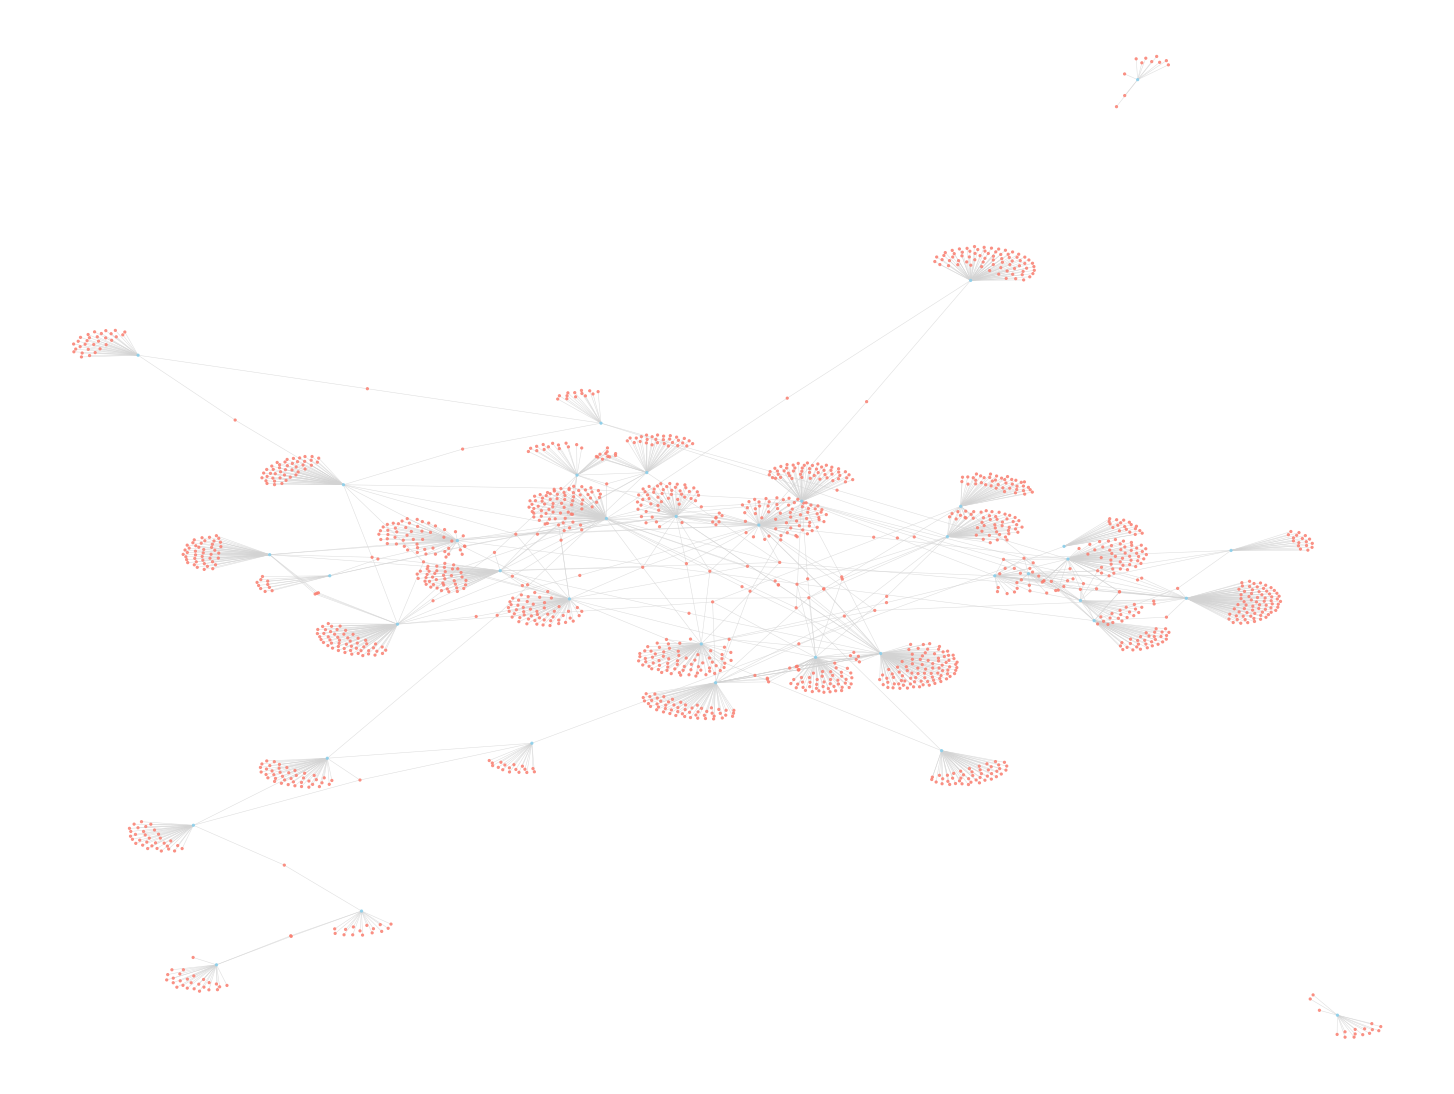

In [33]:
pos = nx.spring_layout(G)
plt.figure(figsize = (20, 15))
nx.draw(G, pos, with_labels = False, font_size = 5, node_size = 5, node_color = cmap, alpha = 0.8, edge_color='lightgrey', width = .5)
plt.show()

### 5.3. Find the sub-networks partitions

Create a slice of the graph which regards only the central big network

In [37]:
S = get_subnets(G = G)

What does S contain?

In [38]:
S

Get a glimpse of the first 10 movies in each S subset

In [40]:
len(S[0])

1589

In [41]:
len(S[1])

17

In [42]:
len(S[2])

12

Fill the movies and characters with different colors and plot the outcast network.

In [44]:
cmap = []
for node in S[1].nodes:
    if node in marvel['title'].unique():
        c = 'skyblue'
    else:
        c = 'salmon'
    cmap.append(c)

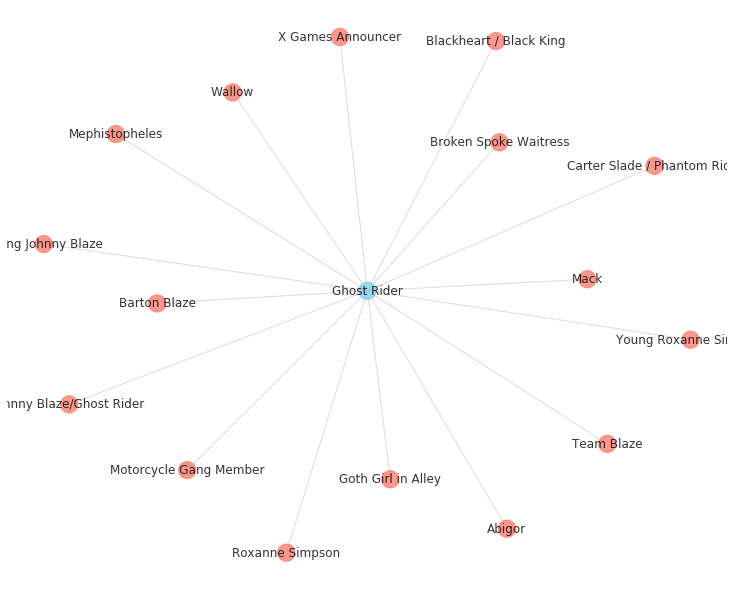

In [45]:
pos = nx.spring_layout(S[1])
plt.figure(figsize = (10, 8))
nx.draw(S[1], pos, with_labels = True, font_size = 12, node_size = 300, node_color = cmap, alpha = 0.8, edge_color='lightgrey', width = 1)
plt.show()

### 5.4. Connect only movies

Now that we know the movies that are connected by actors, let's keep in our network only the connections between movies.<br>
To build this network, start by connecting the `movie_id` with each `character` and then project only the movies. Finally, select only the big central network as well (as in the previous step)

In [46]:
G = nx.Graph()

G = nx.from_pandas_edgelist(marvel_movies_and_heroes, 'movie_id', 'character')

movie_ids = [x for x in list(G.nodes) if x in marvel['movie_id'].unique()]
mapping = dict(marvel[['movie_id','title']].drop_duplicates().values)

G_movies = bipartite.projected_graph(G, movie_ids)
G_movies = nx.relabel_nodes(G_movies, mapping)
S = get_subnets(G = G_movies)

In [47]:
S

Plot the network. Since we have only movies now, color the nodes with just one color.

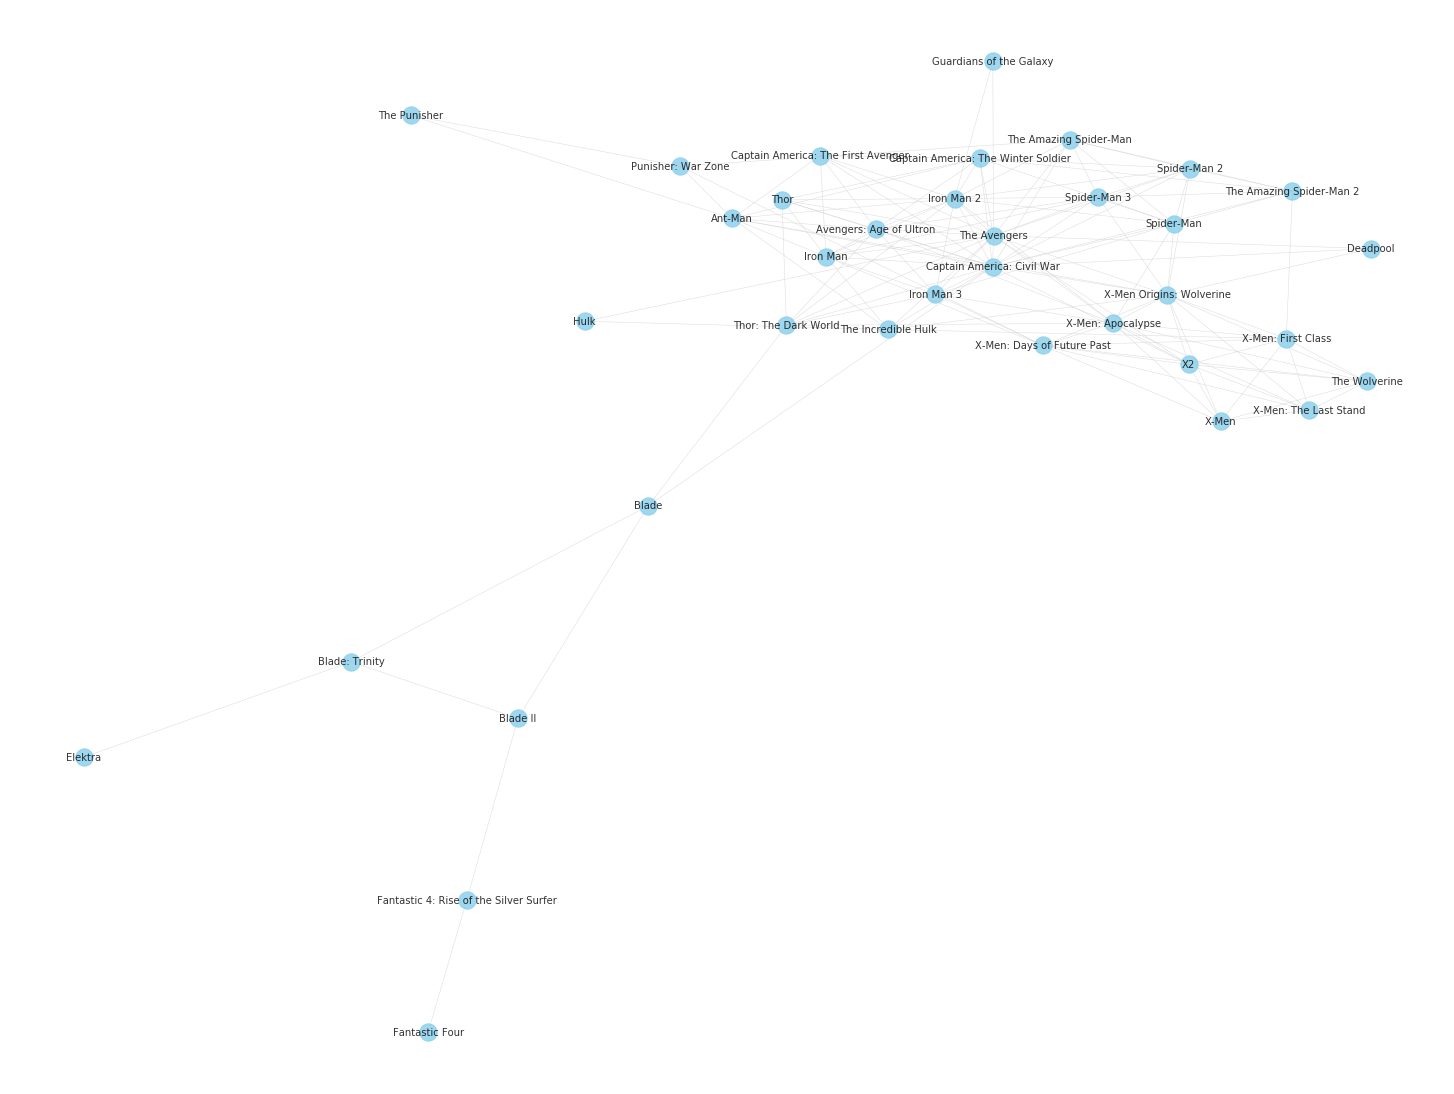

In [48]:
pos = nx.spring_layout(S[0])
plt.figure(figsize = (20, 15))
nx.draw(S[0], pos, with_labels = True, font_size = 10, node_color = 'skyblue', alpha = 0.8, edge_color='lightgrey', width = .5)
plt.show()

How important is each node? Explore the following centrality measures:
* Degree Centrality - Measures nodes neighbourhood
* Betweenness Centrality - Measures intermediate nodes between the shortest path between other node pairs
* Eigenvector Centrality - Measure of the influence of a node in a network. Dynamic scoring.

In [49]:
#marvel_centrality = pd.DataFrame(nx.degree_centrality(S[0]).items(), columns = ['title', 'centrality'])
#marvel_centrality = pd.DataFrame(nx.betweenness_centrality(S[0]).items(), columns = ['title', 'centrality'])
marvel_centrality = pd.DataFrame(nx.eigenvector_centrality(S[0]).items(), columns = ['title', 'centrality'])

marvel_centrality.sort_values(by = 'centrality', ascending = False, inplace = True)
marvel_centrality

,title,centrality
4,Captain America: Civil War,0.340902
2,The Avengers,0.320670
12,Iron Man 2,0.298057
1,Avengers: Age of Ultron,0.246626
16,X-Men Origins: Wolverine,0.236343
11,Iron Man,0.219589
10,X-Men: Apocalypse,0.216916
0,Spider-Man 3,0.215513
13,Captain America: The Winter Soldier,0.205417
19,Spider-Man,0.201436


Using the previous dataframe, append a new column regarding the revenue of each movie. 

In [ ]:
marvel_centrality.merge(df[['Title', 'Revenue']])

What is the correlation between centrality and revenue? What can you conclude?

# 6. Movies and main actors

In [50]:
def get_random_color_dict(clusters):
    d = {}
        
    for cluster in clusters:
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        for idx in cluster:
            d[idx] = color
    return d

Create a subset DataFrame of titles which have both budget and revenue higher than zero. Then, explode the cast feature so you have a record for each actor. Lastly, for each movie, keep only the actors name whose order is equal or below to 3.

In [51]:
sample = df.loc[(df['budget'] > 0) & (df['revenue'] > 0)].copy()

sample = sample.explode('cast')
sample['order'] = sample['cast'].str['order']
sample['actor'] = sample['cast'].str['name']
sample = sample.loc[sample['order'] <= 3].drop(columns = 'order')
sample.head()

,movie_id,title,cast,id,genres,production_companies,release_date,budget,revenue,runtime,vote_average,year,actor
0,19995,Avatar,"{'cast_id': 242, 'character': 'Jake Sully', 'c...",19995,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...",2009-12-10,237000000,2787965087,162.0,7.2,2009.0,Sam Worthington
0,19995,Avatar,"{'cast_id': 3, 'character': 'Neytiri', 'credit...",19995,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...",2009-12-10,237000000,2787965087,162.0,7.2,2009.0,Zoe Saldana
0,19995,Avatar,"{'cast_id': 25, 'character': 'Dr. Grace August...",19995,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...",2009-12-10,237000000,2787965087,162.0,7.2,2009.0,Sigourney Weaver
0,19995,Avatar,"{'cast_id': 4, 'character': 'Col. Quaritch', '...",19995,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...",2009-12-10,237000000,2787965087,162.0,7.2,2009.0,Stephen Lang
1,285,Pirates of the Caribbean: At World's End,"{'cast_id': 4, 'character': 'Captain Jack Spar...",285,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",2007-05-19,300000000,961000000,169.0,6.9,2007.0,Johnny Depp


### 6.1. Partitions of movie networks

Create a network that connects movie id's to each actor. Then, subsequently, project only the movies and replace the id's by the titles. Lastly, focus on the biggest individual network.

In [52]:
G = nx.Graph()

G = nx.from_pandas_edgelist(sample, 'movie_id', 'actor')

movie_ids = [x for x in list(G.nodes) if x in sample['movie_id'].unique()]
mapping = dict(sample[['movie_id','title']].drop_duplicates().values)

G_movies = bipartite.projected_graph(G, movie_ids)
G_movies = nx.relabel_nodes(G_movies, mapping)
S = get_subnets(G = G_movies)

How many nodes do we have?

In [53]:
len(S)

177

### 6.2. Cluster

Using a clustering algorithm from networkx (for example, the `greedy_modularity_communities`, cluster our current network.

In [54]:
# Cluster
from networkx.algorithms.community import greedy_modularity_communities

c = list(greedy_modularity_communities(S[0]))

What is the size of each cluster? print the first 10 movies of the first cluster

In [55]:
list(map(len, c))

[904, 839, 815, 339, 33, 15, 13, 13, 8, 8, 6, 5, 5, 5, 4, 4, 3, 3, 3, 3, 2]

In [56]:
list(c[0])[:10]

['The Lincoln Lawyer',
 'Race',
 'The Best Little Whorehouse in Texas',
 'Blazing Saddles',
 'Ray',
 'Employee of the Month',
 'The Conjuring 2',
 'Donnie Darko',
 'Angel Eyes',
 'The Losers']

### 6.3. Visualizing a sample

Since we have a ton of movies, let's visualize only a sample. From our network, select 200 data points to plot.

In [57]:
random_sample = random.sample(S[0].nodes, 200)
S2 = S[0].subgraph(random_sample)
d = get_random_color_dict(clusters = c)

cmap = []
for x in S2.nodes:
    cmap.append(d[x])

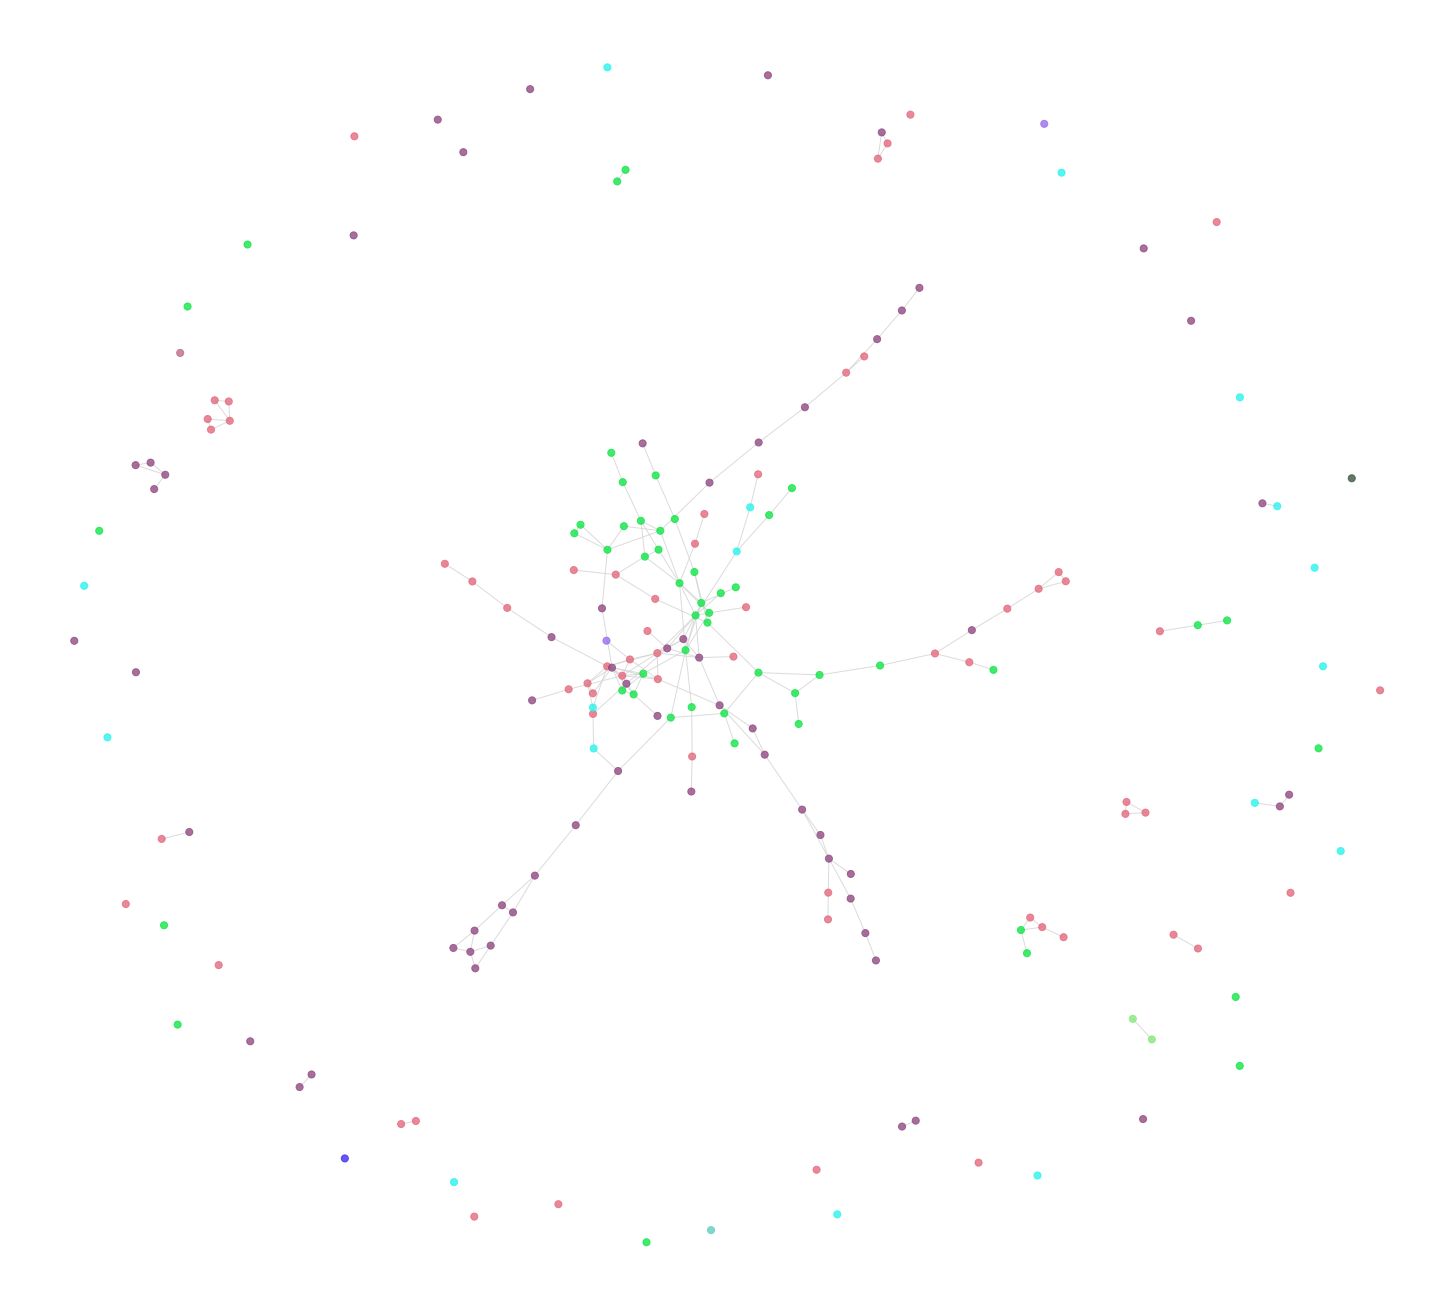

In [58]:
pos = nx.spring_layout(S2)
plt.figure(figsize = (20, 18))
nx.draw(S2, pos, with_labels = False, font_size = 8, alpha = 0.8, width = 1, edge_color='lightgrey', 
        node_size = 50, node_color = cmap)
plt.show()

### 6.4. Cluster Profilling

Just looking at the graph, it is very hard to make many real conclusions. Add the cluster id to each movie row.

In [59]:
df_profile = sample[['title', 'production_companies', 'year', 'budget', 'revenue', 'runtime', 'vote_average']].copy()
df_profile.drop_duplicates(subset = 'title', inplace = True)
df_profile.head()

,title,production_companies,year,budget,revenue,runtime,vote_average
0,Avatar,"[{'name': 'Ingenious Film Partners', 'id': 289...",2009.0,237000000,2787965087,162.0,7.2
1,Pirates of the Caribbean: At World's End,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",2007.0,300000000,961000000,169.0,6.9
2,Spectre,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",2015.0,245000000,880674609,148.0,6.3
3,The Dark Knight Rises,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",2012.0,250000000,1084939099,165.0,7.6
4,John Carter,"[{'name': 'Walt Disney Pictures', 'id': 2}]",2012.0,260000000,284139100,132.0,6.1


In [60]:
for cluster_id, movies in enumerate(c):
    df_profile.loc[df_profile['title'].isin(list(movies)), 'cluster'] = cluster_id

df_profile.head()

,title,production_companies,year,budget,revenue,runtime,vote_average,cluster
0,Avatar,"[{'name': 'Ingenious Film Partners', 'id': 289...",2009.0,237000000,2787965087,162.0,7.2,0.0
1,Pirates of the Caribbean: At World's End,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",2007.0,300000000,961000000,169.0,6.9,1.0
2,Spectre,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",2015.0,245000000,880674609,148.0,6.3,1.0
3,The Dark Knight Rises,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",2012.0,250000000,1084939099,165.0,7.6,1.0
4,John Carter,"[{'name': 'Walt Disney Pictures', 'id': 2}]",2012.0,260000000,284139100,132.0,6.1,2.0


Add the following features to your dataset:
* `profit_ratio` - the ratio between revenue and budget
* `profit_ratio_log` - the log(10) value of the profit_ratio
* `budget_log` - the log(10) value of the budget
* `revenue_log` - the log(10) value of the revenue
* `rating_diff` - the difference between each movie average vote and the overall movies average rating

How can you describe each cluster? Use the centroids and visualizations

In [ ]:
plt.style.use('default')
plt.figure(figsize = (15, 5))
ax = sns.barplot(x = "cluster", y = "cluster", data = df_profile, estimator = lambda x: len(x) / len(df_profile), color = 'skyblue')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
sns.despine(left = True)
plt.title('Cluster data points distribution')
plt.show()

# Bonus: 6 Degrees of Kevin Bacon
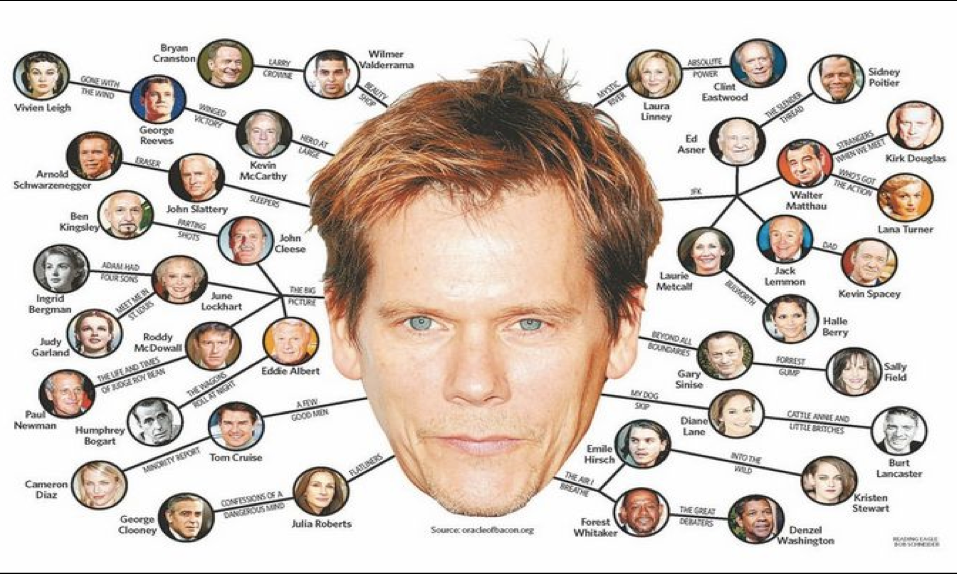

_Six Degrees of Kevin Bacon or Bacon's Law is a parlor game where players challenge each other to find the shortest path between an arbitrary actor and prolific actor Kevin Bacon, linked by films they have appeared in together. It rests on the assumption that anyone involved in the Hollywood film industry can be linked through their film roles to Bacon within six steps. The game's name is a reference to "six degrees of separation", a concept which posits that any two people on Earth are six or fewer acquaintance links apart._
<br>source: https://en.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon

`Checkpoint`<br>
if you made any mistake previously, run the cell bellow to import the data again.

In [61]:
credits = pd.read_csv('tmdb_5000_credits.csv')[['movie_id', 'title', 'cast']]
movies = pd.read_csv('tmdb_5000_movies.csv')[['id', 'genres', 'production_companies' , 'release_date', 'budget', 'revenue', 'runtime', 'vote_average']]
df = credits.merge(movies, left_on = 'movie_id', right_on = 'id', how = 'inner') 
df['cast'] = df['cast'].apply(ast.literal_eval)
df['genres'] = df['genres'].apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(ast.literal_eval)

1. Create a DataFrame called `movies_and_actors` that contains only the features `['movie_id','title', 'cast']`
2. Explode the `cast` feature to create a row for each actor
3. Extract the actor name and drop the cast feature

4. Create a network from the previous DataFrame to coonnect all movie titles to all actors

5. Create a list called `random_actors` that draws _N_ random actors from our imdb.

6. Start by assigning a new empty graph to a variable. Then, iterate your random actors list and try to find the shortest path between each actor and _Kevin Bacon_. If a path is found, add the path to the graph, otherwise, add the node of that actor to the network

7. Create an empty color list and iterate the nodes on your new network. Assign different colors if the node is Kevin itself, if the node regards a movie, or if the node is an actor.

8. Plot your network.

9. Project only actors in a new network. Consider all actors in the `movies_and_actors` dataset.

10. Try to answer the following questions:
    * How many actors does our network contain?
    * How many actors are more than 6 degrees apart from Kevin Bacon?
    * What's the total number of actors without any connection to Kevin Bacon?